## loading data and libraries

In [1]:
import pandas as pd 
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sales =  pd.read_csv('./data/phppos_sales.csv')
sales_items =  pd.read_csv('./data/phppos_sales_items.csv')

In [3]:
all_sales = pd.merge(sales_items , sales , on = 'sale_id')

In [4]:
all_sales

,sale_id,item_id,quantity_purchased,item_cost_price,item_unit_price,discount_percent,sale_time,customer_id,employee_id,comment,payment_type
0,1,1,3,94.00,130.0,0,2005-10-12 22:47:28,NaN,1,NaN,Cash
1,1,2,2,109.00,120.0,0,2005-10-12 22:47:28,NaN,1,NaN,Cash
2,2,1,5,94.00,130.0,0,2005-10-12 22:54:00,NaN,2,NaN,Cash
3,2,2,1,109.00,120.0,0,2005-10-12 22:54:00,NaN,2,NaN,Cash
4,3,1,1,94.00,130.0,0,2020-07-05 12:42:15,NaN,1,NaN,Cash
...,...,...,...,...,...,...,...,...,...,...,...
120170,81421,1431,1,9.00,10.0,0,2022-02-12 18:06:47,NaN,1,NaN,Cash
120171,81422,973,1,3.60,5.0,0,2022-02-12 18:11:13,NaN,1,NaN,Cash
120172,81423,1433,1,4.00,5.0,0,2022-02-12 18:16:18,NaN,1,NaN,MPESA
120173,81428,41,4,4.05,7.5,0,2022-02-12 18:28:03,NaN,1,NaN,Cash


## data cleaning

minimart was opened on 2020 thus data from 2005 was wrongly filled

In [5]:
all_sales.sale_time = pd.to_datetime(all_sales.sale_time,format = '%Y-%m-%d %H:%M')

In [6]:
all_sales = all_sales[all_sales.sale_time > "2005-12-31"]

In [7]:
all_sales.dtypes

sale_id                        int64
item_id                        int64
quantity_purchased             int64
item_cost_price              float64
item_unit_price              float64
discount_percent               int64
sale_time             datetime64[ns]
customer_id                  float64
employee_id                    int64
comment                       object
payment_type                  object
dtype: object

drop irrelevant colomns of the data set

In [8]:
all_sales = all_sales.drop(['discount_percent','comment','customer_id','employee_id'],axis = 1 )

In [9]:
all_sales[all_sales.quantity_purchased < 0]

,sale_id,item_id,quantity_purchased,item_cost_price,item_unit_price,sale_time,payment_type
16,9,1,-1,94.00,130.0,2020-07-05 13:14:09,Cash
553,427,112,-1,100.00,150.0,2020-07-21 17:06:00,Cash
575,445,97,-1,45.00,100.0,2020-07-22 15:55:31,Cash
751,592,97,-2,45.00,100.0,2020-08-13 07:56:57,Cash
784,621,48,-1,33.50,50.0,2020-08-13 17:34:06,Cash
...,...,...,...,...,...,...,...
118287,80083,4,-2,114.20,120.0,2022-01-27 17:35:31,Cash
118490,80236,480,-1,32.00,50.0,2022-01-30 13:28:42,Cash
119550,80982,1006,-1,541.66,580.0,2022-02-08 17:56:50,Cash
119914,81235,289,-500,0.90,1.0,2022-02-11 15:01:43,Cash


573 items were returned

In [10]:

# item cost price is reater tan item sellin price
n_price = all_sales[all_sales.item_cost_price > all_sales.item_unit_price]


# item cost price is less tan item sellin price
t_price = all_sales[all_sales.item_cost_price < all_sales.item_unit_price]

In [11]:
n_price.groupby('item_id')['quantity_purchased'].count()

item_id
94      53
95      50
214      1
284     17
392     13
399     11
438      2
466      1
546      1
608      1
609      1
817      7
834     11
876      3
1006     3
1074     1
1110    11
Name: quantity_purchased, dtype: int64

14 items were  item unit and cost price was wonly entered in the system 

3 items unit cost price were wronly entered

In [12]:
n_price[n_price.item_id == 1110]

,sale_id,item_id,quantity_purchased,item_cost_price,item_unit_price,sale_time,payment_type
41774,27742,1110,1,288.0,223.0,2021-01-31 12:17:14,Cash
42186,28004,1110,1,288.0,223.0,2021-02-01 14:46:24,MPESA
47228,31126,1110,1,288.0,223.0,2021-02-16 17:40:55,MPESA
50652,33270,1110,1,288.0,223.0,2021-02-27 14:53:30,Cash
59155,38874,1110,1,288.0,223.0,2021-03-25 17:46:18,MPESA
63923,41991,1110,1,288.0,223.0,2021-04-12 14:48:18,MPESA
80264,52934,1110,1,288.0,223.0,2021-06-07 14:15:05,MPESA
88297,58463,1110,1,288.0,223.0,2021-07-09 16:47:01,Cash
88933,58898,1110,1,288.0,223.0,2021-07-12 16:03:39,Cash
107085,71973,1110,1,288.0,223.0,2021-10-22 02:56:14,MPESA


In [13]:
i834 = n_price[n_price.item_id == 834]
n_i834 = n_price[n_price.item_id != 834]

In [14]:
i834.item_cost_price = 45.0

C:\Users\mickn\AppData\Local\Temp\ipykernel_1056\2792711725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i834.item_cost_price = 45.0


In [15]:
n_price = pd.concat([n_i834,i834])

In [16]:
all_sales

,sale_id,item_id,quantity_purchased,item_cost_price,item_unit_price,sale_time,payment_type
4,3,1,1,94.00,130.0,2020-07-05 12:42:15,Cash
5,3,2,1,109.00,120.0,2020-07-05 12:42:15,Cash
6,4,1,3,94.00,130.0,2020-07-05 12:52:46,Cash
7,4,2,2,109.00,120.0,2020-07-05 12:52:46,Cash
8,5,1,1,94.00,130.0,2020-07-05 12:54:43,Cash
...,...,...,...,...,...,...,...
120170,81421,1431,1,9.00,10.0,2022-02-12 18:06:47,Cash
120171,81422,973,1,3.60,5.0,2022-02-12 18:11:13,Cash
120172,81423,1433,1,4.00,5.0,2022-02-12 18:16:18,MPESA
120173,81428,41,4,4.05,7.5,2022-02-12 18:28:03,Cash


In [17]:
i438 = n_price[n_price.item_id == 438]
n_i438 = n_price[n_price.item_id != 438]

In [18]:
i438.item_cost_price = 35.0

C:\Users\mickn\AppData\Local\Temp\ipykernel_1056\2257334176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i438.item_cost_price = 35.0


In [19]:
n_price = pd.concat([n_i438,i438])

In [20]:
i1006 = n_price[n_price.item_id == 1006]
n_i1006 = n_price[n_price.item_id != 1006]

In [21]:
i1006.item_cost_price.replace(55000.0 , 550.0 , inplace=True)

C:\Users\mickn\AppData\Local\Temp\ipykernel_1056\2669379045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i1006.item_cost_price.replace(55000.0 , 550.0 , inplace=True)


In [22]:
n_price = pd.concat([n_i1006,i1006])

In [23]:
r_n_price = n_price[n_price.item_cost_price > n_price.item_unit_price]
n_price = n_price[n_price.item_cost_price < n_price.item_unit_price]

In [24]:
a_price = r_n_price.copy()

In [25]:
r_n_price.item_cost_price = a_price.item_unit_price
r_n_price.item_unit_price = a_price.item_cost_price

In [26]:
n_price = pd.concat([n_price, r_n_price])

In [27]:
all_sales = pd.concat([t_price , n_price])

In [28]:
all_sales.drop_duplicates()

,sale_id,item_id,quantity_purchased,item_cost_price,item_unit_price,sale_time,payment_type
4,3,1,1,94.0,130.0,2020-07-05 12:42:15,Cash
5,3,2,1,109.0,120.0,2020-07-05 12:42:15,Cash
6,4,1,3,94.0,130.0,2020-07-05 12:52:46,Cash
7,4,2,2,109.0,120.0,2020-07-05 12:52:46,Cash
8,5,1,1,94.0,130.0,2020-07-05 12:54:43,Cash
...,...,...,...,...,...,...,...
88297,58463,1110,1,223.0,288.0,2021-07-09 16:47:01,Cash
88933,58898,1110,1,223.0,288.0,2021-07-12 16:03:39,Cash
107085,71973,1110,1,223.0,288.0,2021-10-22 02:56:14,MPESA
117665,79628,1110,1,223.0,288.0,2022-01-21 09:25:13,Cash


In [29]:
all_sales.to_csv('pos_sales.csv' , index = False)

## Feature engineering

In [30]:
pos_sales = pd.read_csv('pos_sales.csv')

In [31]:
pos_sales['total_buyin_p'] = pos_sales.quantity_purchased * pos_sales.item_cost_price
pos_sales['total_sellin_p'] = pos_sales.quantity_purchased * pos_sales.item_unit_price
pos_sales['profit'] = pos_sales.total_sellin_p - pos_sales.total_buyin_p

In [32]:
pos_sales.sale_time = pd.to_datetime(pos_sales.sale_time,format = '%Y-%m-%d %H:%M')

In [33]:
pos_sales['year'] = pos_sales['sale_time'].dt.year
pos_sales['month'] = pos_sales['sale_time'].dt.month

pos_sales['day'] = pos_sales['sale_time'].dt.day
pos_sales['dayofweek'] = pos_sales['sale_time'].dt.dayofweek
pos_sales['hour'] = pos_sales['sale_time'].dt.hour

In [34]:
pos_sales.payment_type.replace('Cash' , 0 , inplace=True)
pos_sales.payment_type.replace('MPESA' , 1 , inplace=True)

In [35]:
pos_sales = pos_sales.drop(['sale_time','sale_id'],axis = 1)

In [36]:
pos_sales

,item_id,quantity_purchased,item_cost_price,item_unit_price,payment_type,total_buyin_p,total_sellin_p,profit,year,month,day,dayofweek,hour
0,1,1,94.0,130.0,0,94.0,130.0,36.0,2020,7,5,6,12
1,2,1,109.0,120.0,0,109.0,120.0,11.0,2020,7,5,6,12
2,1,3,94.0,130.0,0,282.0,390.0,108.0,2020,7,5,6,12
3,2,2,109.0,120.0,0,218.0,240.0,22.0,2020,7,5,6,12
4,1,1,94.0,130.0,0,94.0,130.0,36.0,2020,7,5,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120082,1110,1,223.0,288.0,0,223.0,288.0,65.0,2021,7,9,4,16
120083,1110,1,223.0,288.0,0,223.0,288.0,65.0,2021,7,12,0,16
120084,1110,1,223.0,288.0,1,223.0,288.0,65.0,2021,10,22,4,2
120085,1110,1,223.0,288.0,0,223.0,288.0,65.0,2022,1,21,4,9


## Analysis

daily analysis

<AxesSubplot:xlabel='dayofweek'>

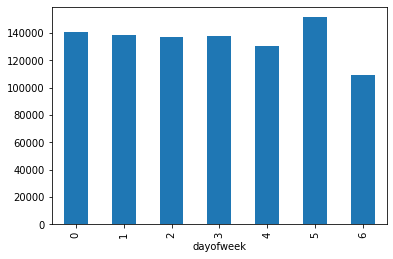

In [37]:
pos_sales.groupby('dayofweek')['profit'].sum().plot.bar()

<AxesSubplot:xlabel='dayofweek'>

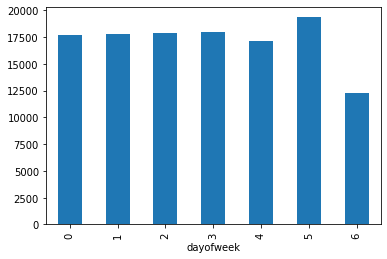

In [38]:
pos_sales.groupby('dayofweek')['quantity_purchased'].count().plot.bar()


monthly analysis

<AxesSubplot:xlabel='month'>

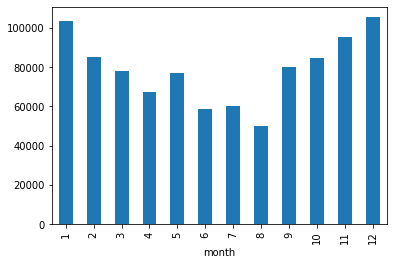

In [39]:
pos_sales.groupby('month')['profit'].sum().plot.bar()

<AxesSubplot:xlabel='month'>

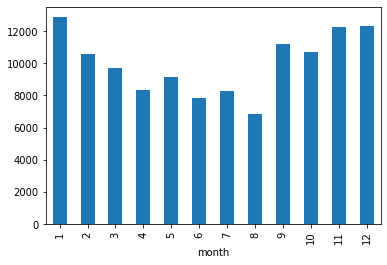

In [40]:
pos_sales.groupby('month')['quantity_purchased'].count().plot.bar()

yearly analysis

<AxesSubplot:xlabel='month,dayofweek'>

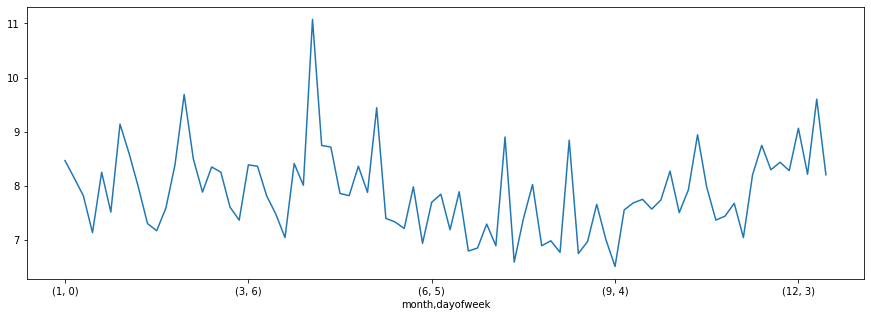

In [41]:
pos_sales.groupby(['month','dayofweek'])['profit'].mean().plot(figsize= (15,5))

<AxesSubplot:xlabel='month,day'>

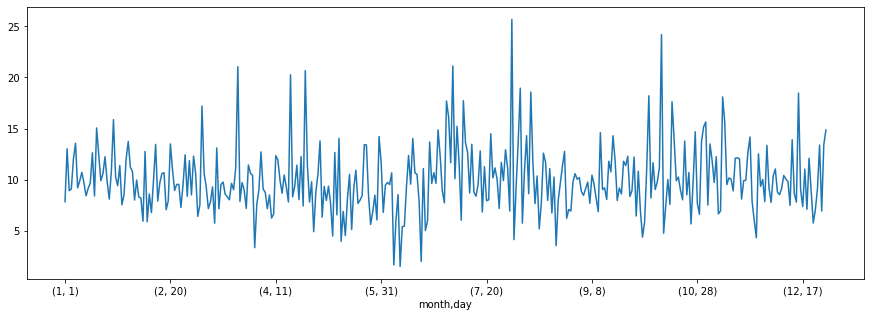

In [42]:
pos_sales.groupby(['month','day'])['quantity_purchased'].mean().plot(figsize= (15 , 5))

item analysis

In [51]:
pos_sales.groupby('item_id')['quantity_purchased'].count().to_frame()

,quantity_purchased
item_id,
1,39
2,37
3,375
4,1831
5,161
...,...
1427,1
1428,1
1429,1


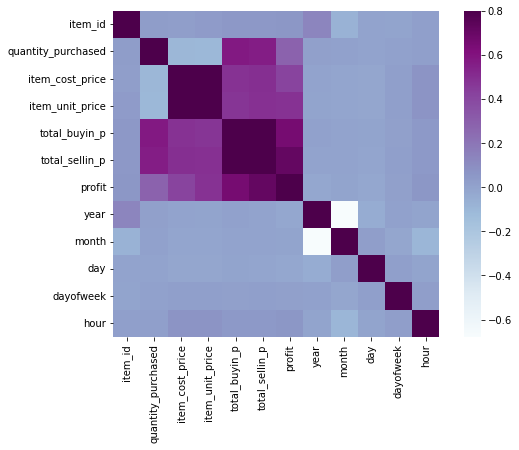

In [44]:
matrix = pos_sales.corr() 
ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix , vmax = .8, square= True , cmap = 'BuPu');

## model

split data

In [45]:
validate = pos_sales[(pos_sales.year >= 2020) > (pos_sales.year > 2021)]
train = pos_sales[(pos_sales.year > 2021) > (pos_sales.year > 2022)]